In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.interpolate import interp1d

from constants import MU, BETA4

plt.style.use('science')

In [2]:
lo = np.loadtxt('spectra_local_lo_a0_fix_hpp_n_14.txt')[::-1, :]
ratios_lo = lo[:, 0] / BETA4
e2s_lo = lo[:, 1:].T

nlo = np.loadtxt('spectra_local_nlo_a0_B6_fix_coord_hp_n_14_coord_ir_corrected.txt')[::-1, :]
ratios_nlo = nlo[:, 0] / BETA4
e2s_nlo = nlo[:, 1:].T

tl = np.loadtxt('spectra_Mott_Massey.txt')

In [3]:
ub = 1/50
lb = 1/70

ii_lo = np.intersect1d(
    np.where(ratios_lo > lb),
    np.where(ratios_lo < ub)
)

f_lo = interp1d(ratios_lo, e2s_lo, kind='cubic')

ii_nlo = np.intersect1d(
    np.where(ratios_nlo > lb),
    np.where(ratios_nlo < ub)
)

f_nlo = interp1d(ratios_nlo, e2s_nlo, kind='cubic')

In [4]:
ratio = 1/65

f_nlo(ratio) / f_lo(ratio)

array([ 3.34524034,  1.80410809,  0.65418952, -0.13903184, -0.63270435,
       -0.89620608, -1.00933729])

In [5]:
min_ratio = np.max(np.hstack((np.min(ratios_lo[ii_lo]), np.min(ratios_nlo[ii_nlo]))))
max_ratio = np.min(np.hstack((np.max(ratios_lo[ii_lo]), np.max(ratios_nlo[ii_nlo]))))

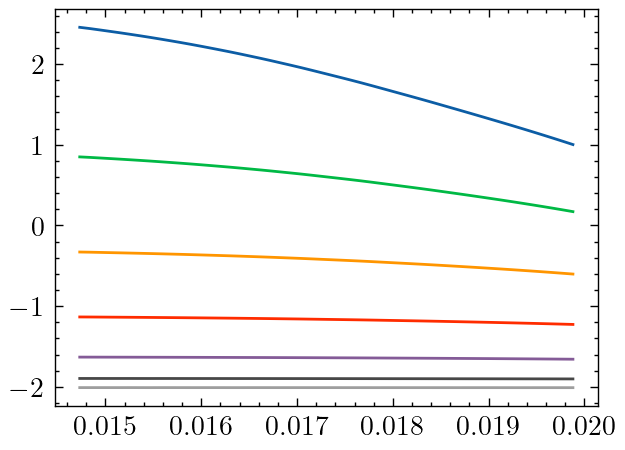

In [6]:
ratios = np.linspace(min_ratio, max_ratio, 50)

fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(ratios, (f_nlo(ratios) / f_lo(ratios)).T - 1);

In [7]:
corrections = ((f_nlo(ratios) / f_lo(ratios)).T - 1).T

In [8]:
corrections.shape

(7, 50)

In [22]:
def convergence(ratio, c_1):
    return c_1*ratio**2


def convergence1(ratio, c_inf, c_1):
    return c_inf*(1 + c_1*ratio**4)


def convergence1n(ratio, c_inf, c_1, n):
    return c_inf * (1 + c_1*ratio**n)


def convergence2(ratio, c_inf, c_1, c_2):
    return c_inf * (1 + c_1*ratio + c_2*ratio**2)

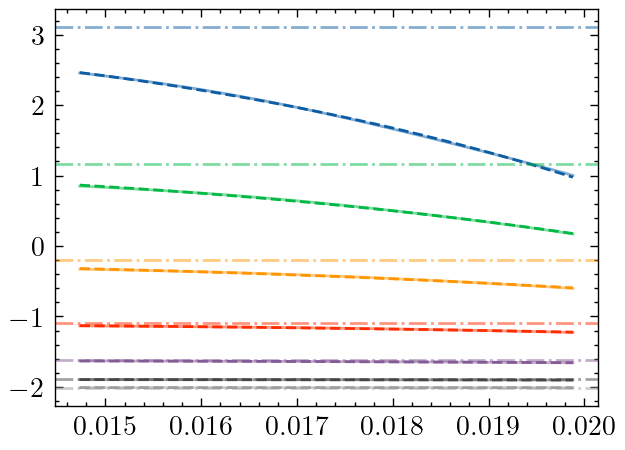

In [23]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for (i, row) in enumerate(corrections):
    pars, cov = optimize.curve_fit(convergence1, ratios, row, maxfev=10000)
    ax.plot(ratios, row, alpha=0.5, color=f'C{i}')
    ax.plot(ratios, convergence1(ratios, *pars), linestyle='--', color=f'C{i}')
    ax.axhline(pars[0], linestyle='-.', color=f'C{i}', alpha=0.5)
# ax.axvline(0, color='k')

[ 3.10337430e+00 -4.38809048e+06]
[ 1.16133895e+00 -5.42655301e+06]
[-2.01256409e-01  1.25008281e+07]
[-1.08977887e+00  7.78734305e+05]
[-1.61880944e+00  1.46598732e+05]
[-1.89307634e+00  2.75803723e+04]
[-2.00879743e+00  3.28248892e+03]


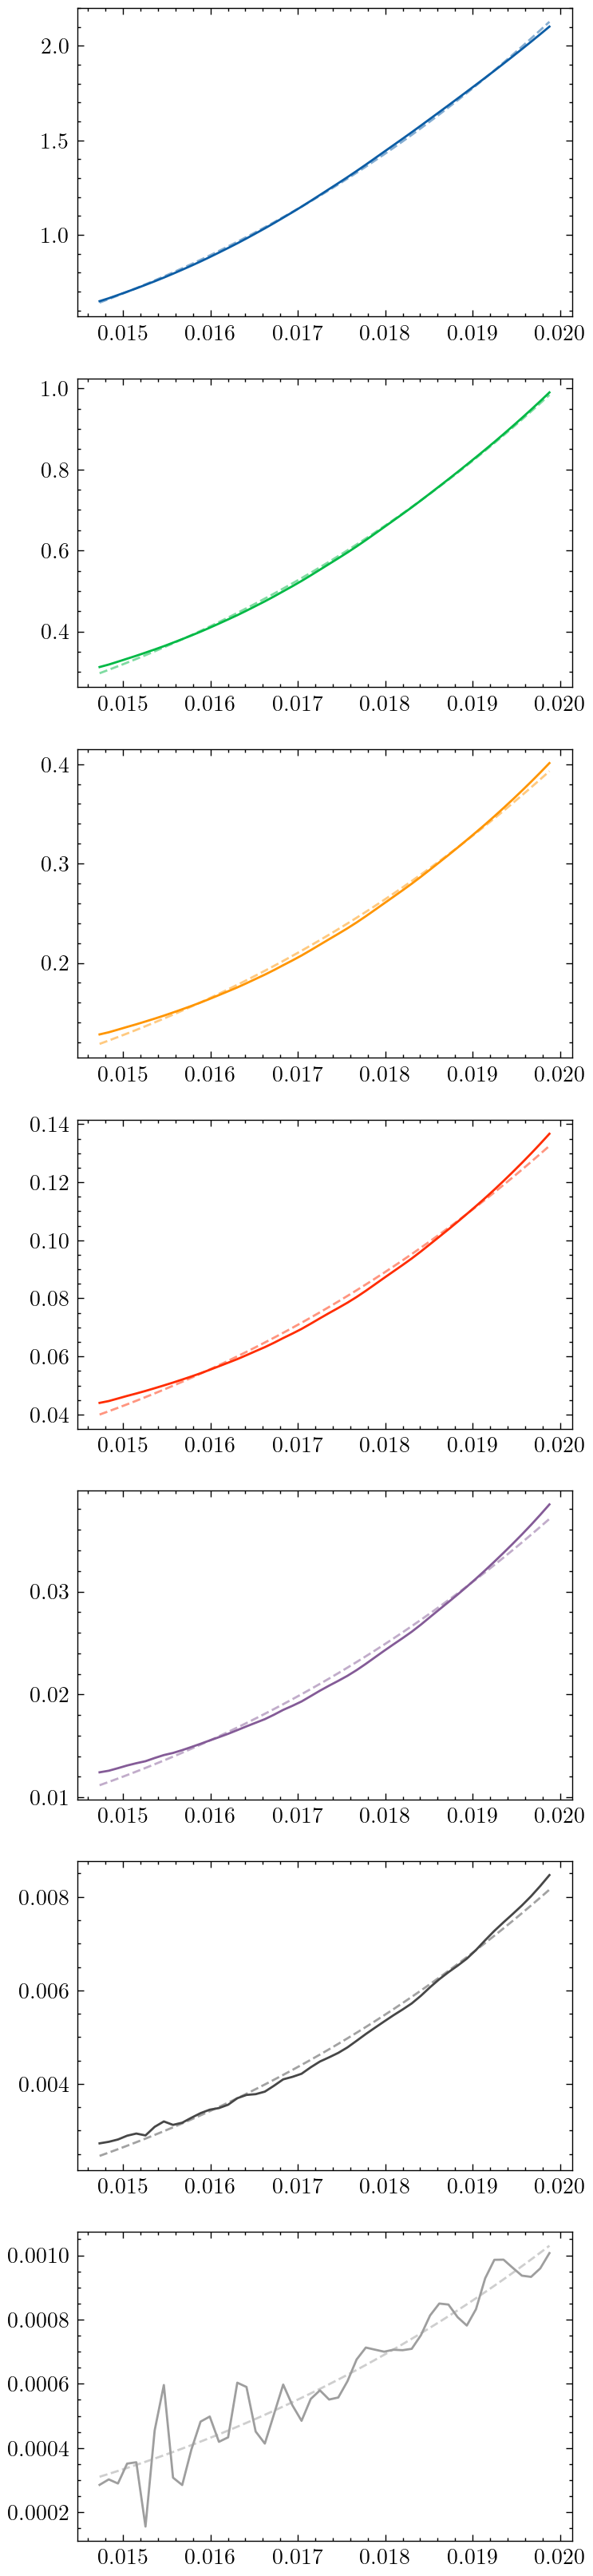

In [24]:
fig, ax = plt.subplots(7, figsize=(4, 7*3), dpi=200)
fig.patch.set_facecolor('white')

for (i, row) in enumerate(corrections):
    pars, cov = optimize.curve_fit(convergence1, ratios, row, maxfev=10000)
    print(pars)
    ax[i].plot(ratios, np.abs(row - pars[0]), color=f'C{i}')
    ax[i].plot(ratios, np.abs(convergence1(ratios, *pars) - pars[0]), alpha=0.5, linestyle='--', color=f'C{i}')